In [1]:
import pandas
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *

In [2]:
event_log = pandas.DataFrame(
    {'case:concept:name' : ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
     'concept:name' : ['A', 'A',
                       'B', 'C', 'B', 'C',
                       'D', 'D',
                       'Z', 'Z'],
     'lifecycle:transition' : ['start', 'complete',
                               'start', 'start', 'complete', 'complete',
                               'start', 'complete',
                               'start', 'complete'],
     'time:timestamp' : ['2024-01-01 09:00:00', '2024-01-01 10:00:00',
                         '2024-01-01 10:00:00', '2024-01-01 11:00:00', '2024-01-01 12:00:00', '2024-01-01 13:00:00',
                         '2024-01-01 13:00:00', '2024-01-01 14:00:00',
                         '2024-01-1  09:30:00', '2024-01-01 13:30:00']
    }
)
event_log['time:timestamp'] = pandas.to_datetime(event_log['time:timestamp'])

In [3]:
start_event_log = event_log[event_log['lifecycle:transition'] == 'start']
complete_event_log = event_log[event_log['lifecycle:transition'] == 'complete']

In [4]:
modified_log = event_log.copy()
modified_log['concept:name'] = modified_log['concept:name'] + modified_log['lifecycle:transition']

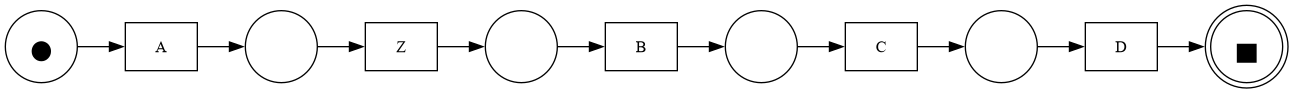

In [5]:
net, im, fm = pm4py.discover_petri_net_inductive(start_event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)


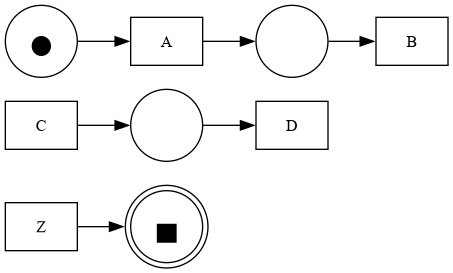

In [6]:
net, im, fm = pm4py.discover_petri_net_alpha(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

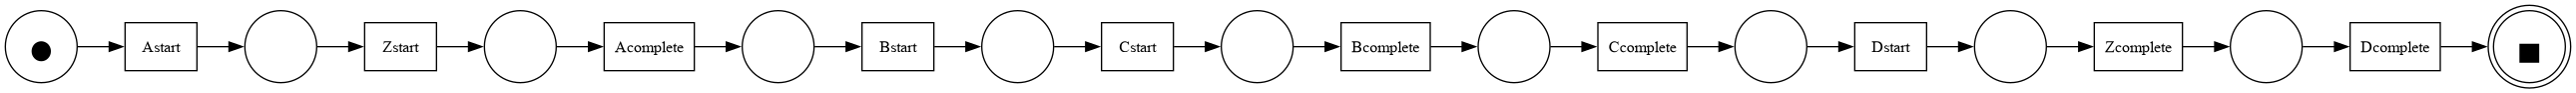

In [7]:
net, im, fm = pm4py.discover_petri_net_inductive(modified_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/11 [00:00<?, ?it/s]

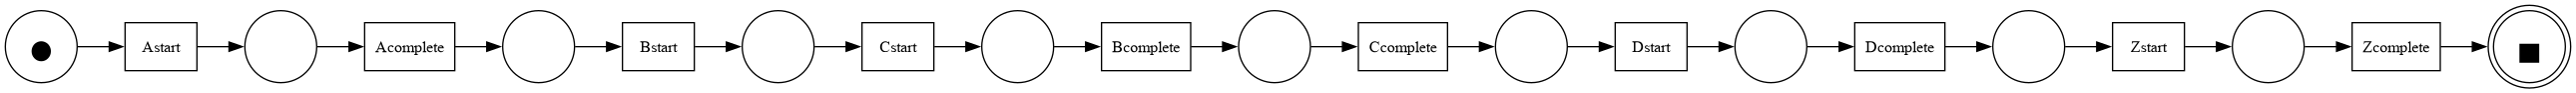

In [8]:
net, im, fm = pm4py.discover_petri_net_ilp(modified_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

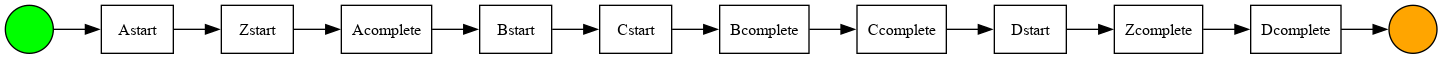

In [9]:
net = pm4py.discovery.discover_bpmn_inductive(modified_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_bpmn(net)

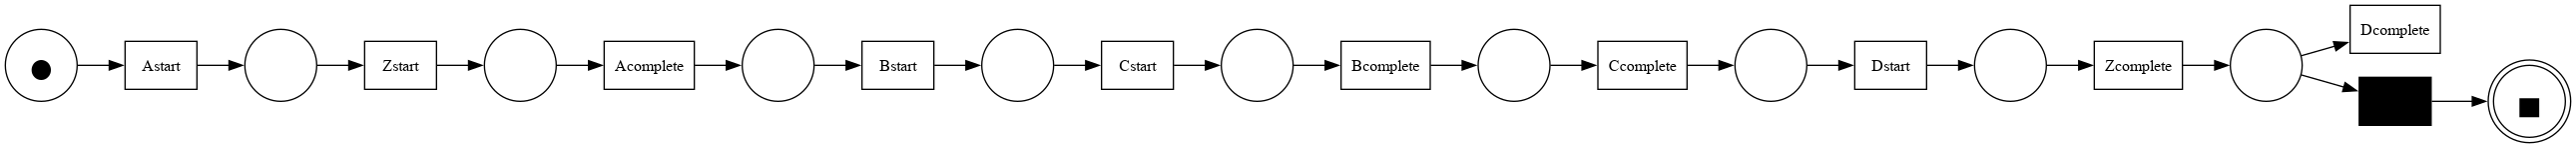

In [10]:
net, im, fm = pm4py.discover_petri_net_heuristics(modified_log)
pm4py.view_petri_net(net, im, fm)

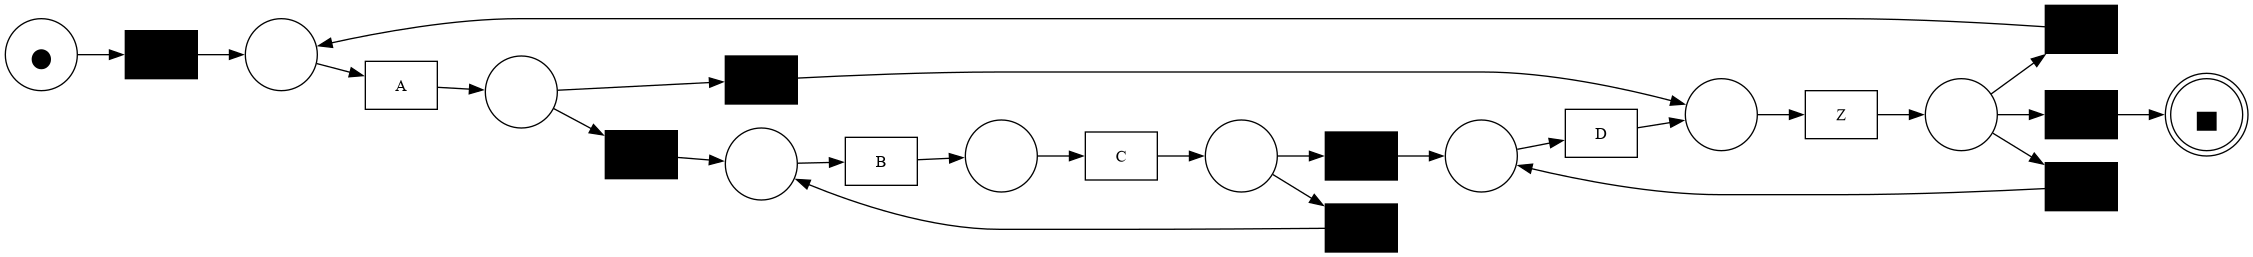

In [11]:
net, im, fm = pm4py.discover_petri_net_heuristics(event_log)
pm4py.view_petri_net(net, im, fm)

/home/michel/.local/share/virtualenvs/TaskExecutionTimeMining-vXwWxPoC/lib/python3.12/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


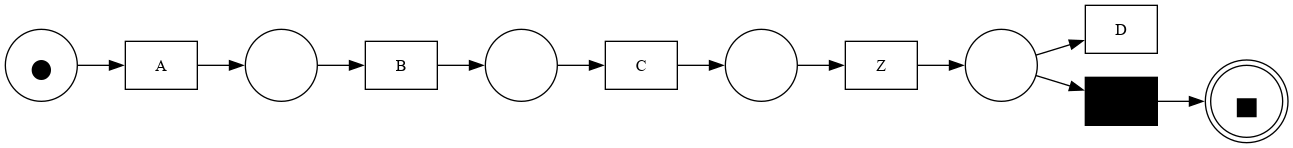

In [12]:
net, im, fm = pm4py.discover_petri_net_heuristics(complete_event_log)
pm4py.view_petri_net(net, im, fm)

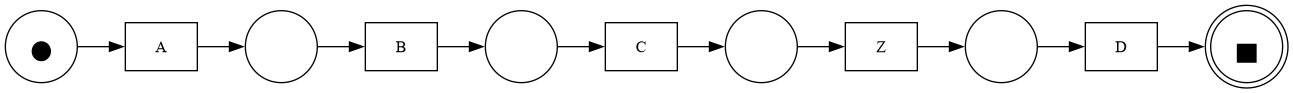

In [13]:
net, im, fm = pm4py.discover_petri_net_inductive(complete_event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

/home/michel/.local/share/virtualenvs/TaskExecutionTimeMining-vXwWxPoC/lib/python3.12/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


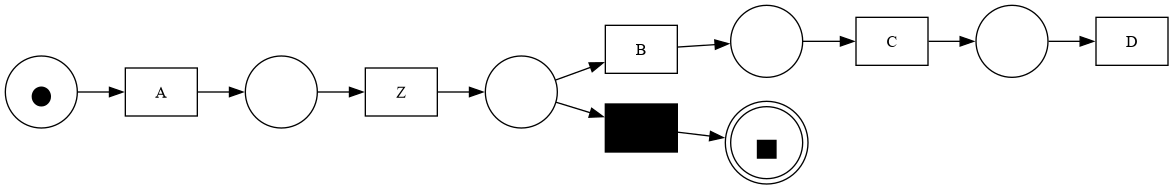

In [14]:
net, im, fm = pm4py.discover_petri_net_heuristics(start_event_log)
pm4py.view_petri_net(net, im, fm)

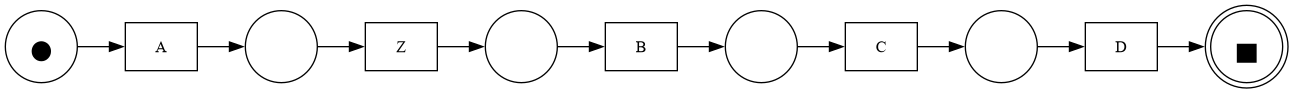

In [15]:
net, im, fm = pm4py.discover_petri_net_inductive(start_event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [16]:
start_end_event_log = TransformEventLog.start_end_event_log_mult(event_log,
                                                                   start_name_1 = 'start',
                                                                   #start_name_2 = 'resume',
                                                                   #complete_name_3 = 'suspend',
                                                                   complete_name_1 = 'complete',
                                                                   unique_column='time:timestamp')

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/various/../../TaskExecutionTimeMining/event_log_transformer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log[timestamp_name + complete_name_gen] - start_end_event_log[timestamp_name + start_name_gen]
/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/various/../../TaskExecutionTimeMining/event_log_transformer.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_ev

In [17]:
start_end_event_log

,case:concept:name,concept:name,lifecycle:transition_start,time:timestamp_start,start_timestamp_start,lifecycle:transition_complete,time:timestamp_complete,start_timestamp_complete,duration,duration_seconds
1,1,A,start,2024-01-01 09:00:00,2024-01-01 09:00:00,complete,2024-01-01 10:00:00,2024-01-01 10:00:00,0 days 01:00:00,3600.0
17,1,Z,start,2024-01-01 09:30:00,2024-01-01 09:30:00,complete,2024-01-01 13:30:00,2024-01-01 13:30:00,0 days 04:00:00,14400.0
5,1,B,start,2024-01-01 10:00:00,2024-01-01 10:00:00,complete,2024-01-01 12:00:00,2024-01-01 12:00:00,0 days 02:00:00,7200.0
7,1,C,start,2024-01-01 11:00:00,2024-01-01 11:00:00,complete,2024-01-01 13:00:00,2024-01-01 13:00:00,0 days 02:00:00,7200.0
13,1,D,start,2024-01-01 13:00:00,2024-01-01 13:00:00,complete,2024-01-01 14:00:00,2024-01-01 14:00:00,0 days 01:00:00,3600.0


In [18]:
start_end_event_log['interval'] = pandas.IntervalIndex.from_arrays(start_end_event_log['time:timestamp_start'], start_end_event_log['time:timestamp_complete'])

In [20]:
activities = set(start_end_event_log['concept:name'].unique())
for index, row in start_end_event_log.iterrows():
    if row['concept:name'] not in activities:
        continue
    interlapping = [row['concept:name']]
    for index_2, row_2 in start_end_event_log.loc[index:].iterrows():
        if index == index_2:
            continue
        if row['interval'].overlaps(row_2['interval']):
            interlapping.append(row_2['concept:name'])
    activities -= set(interlapping)
    print(interlapping)

['A', 'Z']
['B', 'C']
['D']
